In [1]:
## Figure 7 (a) & (d) - Plot Coherence of Ifgram Stack: 1) coherence matrix and 2) network configuration

import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pysar.plot_network as plotnet
from pysar.simulation.plot import *
from pysar.objects import sensor
from pysar.utils import ptime, readfile, plot as pp, network as pnet

work_dir = os.path.expanduser('~/insarlab/PYSAR_EXAMPLE/AlcedoSenDT128/PYSAR')
work_dir = os.path.expanduser('~/insarlab/PYSAR_EXAMPLE/SierraNegraAlosAT133/PYSAR')
os.chdir(work_dir)
print('Go to diretory: '+work_dir)
proj_name = sensor.project_name2sensor_name(work_dir)[1]

inps = plotnet.cmd_line_parse([''])
inps.file = './INPUTS/ifgramStack.h5'
inps.maskFile = 'waterMask.h5'
inps.coh_thres = 0.7
inps.cbar_label = 'Coherence'
inps.disp_title = False
inps.disp_cbar = False
inps.disp_min = 0
inps.markersize = 6
inps.legend_loc = (0.15, 0.1)
inps.disp_legend = False
inps.disp_drop = True
inps.every_year = 2
inps = plotnet.read_network_info(inps)

# list of date12 to date
m_dates = [date12.split('_')[0] for date12 in inps.date12List]
s_dates = [date12.split('_')[1] for date12 in inps.date12List]
date_list = sorted(ptime.yyyymmdd(list(set(m_dates + s_dates))))
num_date = len(date_list)

#colormap: truncate_RdBu
coh_thres = 0.7
c1_num = np.ceil(200.0 * (inps.coh_thres - inps.disp_min) / (inps.disp_max - inps.disp_min)).astype('int')
coh_thres = c1_num / 200.0 * (inps.disp_max - inps.disp_min) + inps.disp_min
cmap = pp.ColormapExt('RdBu').colormap
colors1 = cmap(np.linspace(0.0, 0.3, c1_num))
colors2 = cmap(np.linspace(0.6, 1.0, 200 - c1_num))
cmap = LinearSegmentedColormap.from_list('truncate_RdBu', np.vstack((colors1, colors2)))
print('Done.')

Go to diretory: /Users/yunjunz/insarlab/PYSAR_EXAMPLE/SierraNegraAlosAT133/PYSAR
reading temporal/spatial baselines from ifgramStack file: ./INPUTS/ifgramStack.h5
number of acquisitions: 22
reading interferograms info from file: ./INPUTS/ifgramStack.h5
number of interferograms: 228
--------------------------------------------------
number of interferograms marked as drop: 97
number of interferograms marked as keep: 131
number of acquisitions marked as drop: 0
['ifgramStack_coherence_spatialAvg.txt'] exists and is newer than ['./INPUTS/ifgramStack.h5', 'waterMask.h5'], skip updating.
ifgramStack_coherence_spatialAvg.txt already exists, read it directly
Done.


max perpendicular baseline: 1799.35 m
max temporal      baseline: 1518.0 days
showing coherence
('colormap:', 'RdBu')
('display range:', '[0, 1.0]')
('data    range:', '[0.2491, 0.998]')
('color jump at', '0.7')


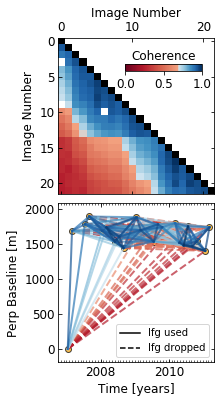

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=[2.8, 6])

# coherence matrix
coh_mat = pnet.coherence_matrix(inps.date12List, inps.cohList, diag_value=np.nan, fill_triangle='lower', date_list=date_list)
im = ax[0].imshow(coh_mat, cmap=cmap, vmin=0, vmax=1)
diag_mat = np.diag(np.ones(num_date))
diag_mat[diag_mat == 0.] = np.nan
ax[0].imshow(diag_mat, cmap='gray_r', vmin=0.0, vmax=1.0, interpolation='nearest')
ax[0].xaxis.tick_top()
ax[0].xaxis.set_label_position("top")
ax[0].set_xlabel('Image Number', fontsize=font_size)
ax[0].set_ylabel('Image Number', fontsize=font_size)
ax[0].tick_params(which='both', direction='in', labelsize=font_size, bottom=True, top=True, left=True, right=True)

# colorbar
cax = fig.add_axes([0.46, 0.8, 0.38, 0.015])
cbar = plt.colorbar(im, cax=cax, ticks=[0., 0.5, 1.], orientation='horizontal')
cbar.ax.tick_params(which='both', direction='out', labelsize=font_size)
cbar.set_label('Coherence', fontsize=font_size)
cax.xaxis.set_label_position("top")

# network configuration
ax[1] = pp.plot_network(ax[1], inps.date12List, inps.dateList, inps.pbaseList, dict(vars(inps)), inps.date12List_drop)
plt.subplots_adjust(hspace=0.05)

fig.savefig('{}_net_coh.png'.format(proj_name), bbox_inches='tight', transparent=True, dpi=fig_dpi)
plt.show()